<a href="https://colab.research.google.com/github/ibukunlola/capstone/blob/main/model3/synth_cont.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# load packages
install.packages("Synth")
library(Synth)
library(tibble)
library(dplyr)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



## Model 1
This model uses country data where all missing values were replaced with the mean of their corresponding column. The donor pool is made up of 205 countries.

In [ ]:
# load cleaned data 
dd <- read.csv(url("https://raw.githubusercontent.com/ibukunlola/capstone/main/model3/average_df.csv"))

# create unique unit numbers for each country in the dataframe
countries <- unique(dd$country_name)
count = 1
for (country in countries){
  indices <- which(dd$country_name == country)
  for (index in indices){
    dd$X[index] <- count
  }
  count = count+1
}

head(dd, n = 10)

,X,country_name,year,fdi,pol_stab,gni,gdp,pop
,<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,Afghanistan,2010,-192022479,-2.579152,15884609987,15856678596,29185511
2,1,Afghanistan,2011,-51036284,-2.502060,17785698871,17805113119,30117411
3,1,Afghanistan,2012,-65684511,-2.418561,19938663919,19907317066,31161378
4,1,Afghanistan,2013,-47774027,-2.519349,20216694880,20146404996,32269592
5,1,Afghanistan,2014,-42994416,-2.411068,20494754800,20497126770,33370804
6,1,Afghanistan,2015,-166983555,-2.571222,19307190568,19134211764,34413603
7,1,Afghanistan,2016,-79585269,-2.671054,18297097175,18116562465,35383028
8,1,Afghanistan,2017,-40273161,-2.801084,19000254383,18753469630,36296111
9,1,Afghanistan,2018,-80631404,-2.763864,18240838102,18053228579,37171922


In [ ]:
# generate new dataframe with per-capita data on the predictors and outcome variable
fdi_pc = dd$fdi/dd$pop
gni_pc = dd$gni/dd$pop
gdp_pc = dd$gdp/dd$pop

dd_pc = data.frame(dd$X, dd$country_name, dd$year, fdi_pc, dd$pol_stab,
                   gni_pc, gdp_pc)

# change column names
colnames(dd_pc) <- c("X", "country_name", "year", "fdi_pc", "pol_stab",
                  "gni_pc", "gdp_pc")

write.csv(dd_pc,"average_pc_df.csv", row.names = FALSE)
head(dd_pc)

,X,country_name,year,fdi_pc,pol_stab,gni_pc,gdp_pc
,<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,Afghanistan,2010,-6.579377,-2.579152,544.2636,543.3065
2,1,Afghanistan,2011,-1.694577,-2.502060,590.5454,591.1900
3,1,Afghanistan,2012,-2.107882,-2.418561,639.8518,638.8459
4,1,Afghanistan,2013,-1.480466,-2.519349,626.4937,624.3155
5,1,Afghanistan,2014,-1.288384,-2.411068,614.1523,614.2233
6,1,Afghanistan,2015,-4.852254,-2.571222,561.0337,556.0072


In [ ]:
# summarize dataset
summary(dd_pc)

       X       country_name            year          fdi_pc          
 Min.   :  1   Length:2050        Min.   :2010   Min.   :-280375.21  
 1st Qu.: 52   Class :character   1st Qu.:2012   1st Qu.:   -350.68  
 Median :103   Mode  :character   Median :2014   Median :    -92.26  
 Mean   :103                      Mean   :2014   Mean   :  -1656.30  
 3rd Qu.:154                      3rd Qu.:2017   3rd Qu.:    -15.99  
 Max.   :205                      Max.   :2019   Max.   : 278715.51  
    pol_stab            gni_pc             gdp_pc       
 Min.   :-3.13097   Min.   :     229   Min.   :    228  
 1st Qu.:-0.65694   1st Qu.:    2158   1st Qu.:   2108  
 Median : 0.04672   Median :    6127   Median :   6368  
 Mean   :-0.02963   Mean   :  259395   Mean   :  18777  
 3rd Qu.: 0.84086   3rd Qu.:   19170   3rd Qu.:  19840  
 Max.   : 1.96506   Max.   :12924473   Max.   :3662586  


X1, X0, Z1, Z0 all come directly from dataprep object.


**************** 
 searching for synthetic control unit  
 

**************** 
**************** 
**************** 

MSPE (LOSS V): 22.68957 

solution.v:
 0.01319928 0.02977641 0.06088497 0.1529441 0.3479102 0.08160839 0.2185135 0.05132401 0.04383923 

solution.w:
 0.6968599 0.0008312541 0.0009141576 8.9268e-05 0.0001161133 0.001753937 0.0005713816 0.0007936777 0.001041624 0.003657727 0.000327065 0.0005296521 0.0008575109 0.0004635285 0.0003855996 0.001577121 0.0003585942 0.0009743051 0.0006803138 0.0008222038 0.001725809 0.0007758293 0.001412011 0.001248514 0.0009811464 0.001002506 0.0007156289 0.0004388125 0.0009732207 0.001982969 0.0133905 0.0009128937 0.001138348 0.001440862 0.0006100473 6.38742e-05 0.0001853717 0.001014867 0.0006627033 0.001004067 0.0006452312 0.001753573 2.0085e-06 0.004535871 0.0007080909 0.001347257 0.0006668882 0.0009388268 0.001574993 0.0005557049 0.0007071846 0.00107086 0.00074435 0.000825246 0.001075

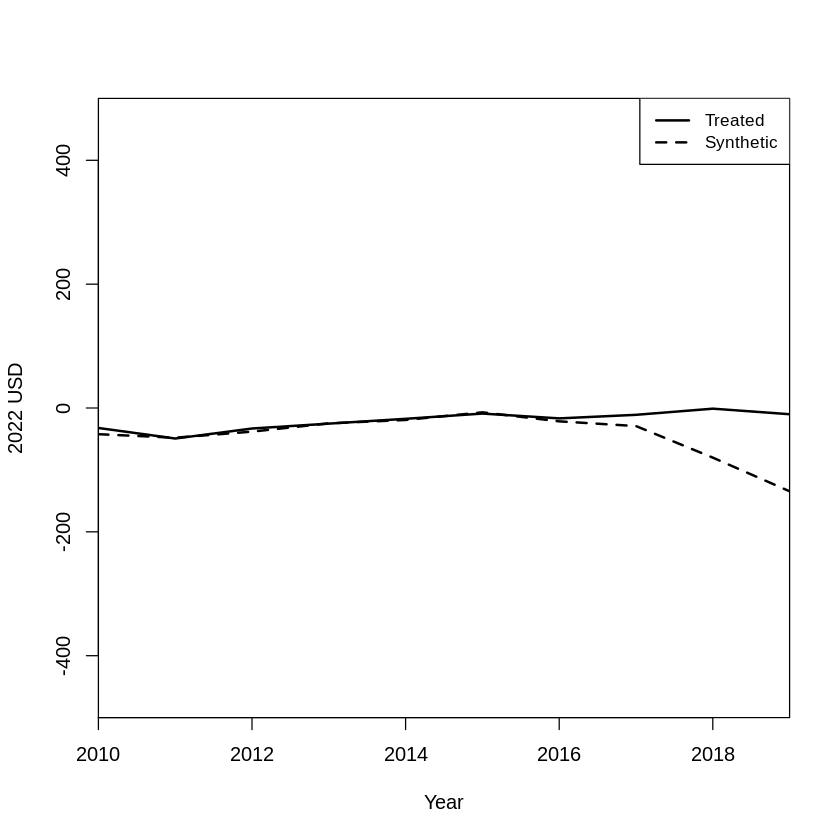

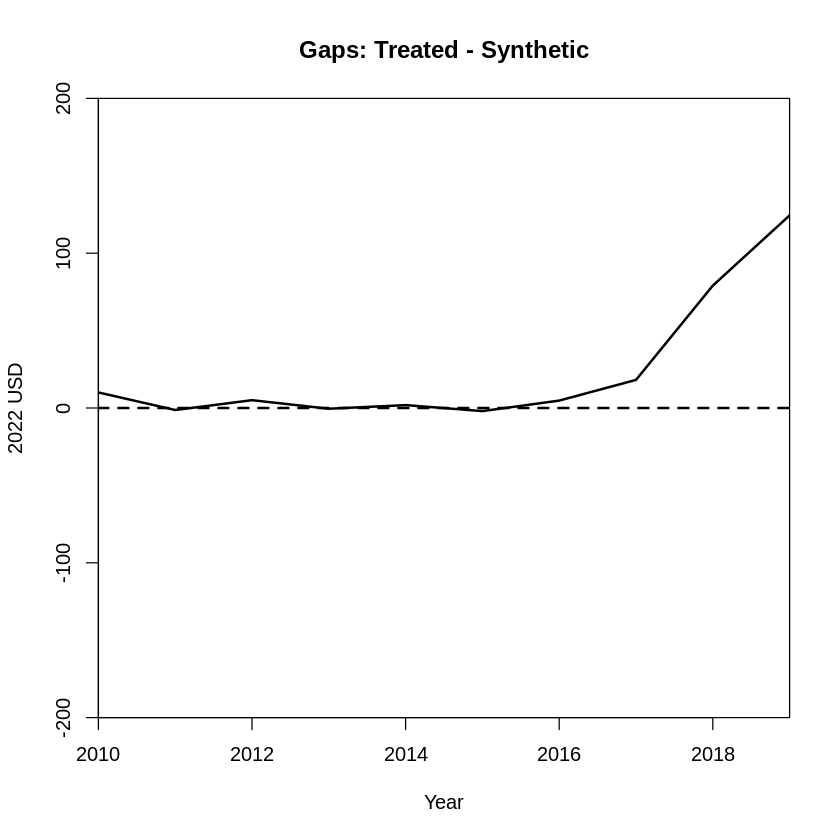

In [ ]:
# run dataprep to rewrite the data in a form suitable for the 'synth' command
dataprep.out <- dataprep(dd_pc, 
                         predictors = 
                           c("pol_stab", 
                             "gdp_pc"), 
                         predictors.op = "mean",
                         special.predictors = list(
                           list("fdi_pc", 2011, "mean"),
                           list("fdi_pc", 2012, "mean"),
                           list("fdi_pc", 2013, "mean"),
                           list("fdi_pc", 2014, "mean"),
                           list("fdi_pc", 2015, "mean"),
                           list("fdi_pc", 2016, "mean"),
                           list("fdi_pc", 2017, "mean")
                           ),             
                         dependent = "fdi_pc",
                         time.variable = 'year', 
                         time.predictors.prior = c(2010:2016), 
                         unit.names.variable = "country_name",
                         time.optimize.ssr = c(2010:2016), 
                         time.plot = 2010:2019, 
                         unit.variable = "X", 
                         treatment.identifier = "Nigeria",
                         controls.identifier = c(setdiff(1:205, 137))
                         )

#run the synthetic control model
synth.out <- synth(dataprep.out)

synth.tables <- synth.tab(
  dataprep.res = dataprep.out, 
  synth.res = synth.out)

print(synth.tables)


# shows outcome trend of the treated and control units
path.plot(dataprep.res = dataprep.out,
          synth.res = synth.out
          ,Ylim = c(-500, 500), 
          Ylab = '2022 USD',
          Xlab = "Year"
          )
          
# shows difference between the treated and control units
gaps.plot(dataprep.res = dataprep.out,
          synth.res = synth.out 
          ,Ylim = c(-200, 200), 
          Ylab = '2022 USD',
          Xlab = "Year"
          )

In [ ]:
#extract the names, weights, and unit numbers of the top 20 donor countries (by weight) in the donor pool
top_donors <- synth.tables$tab.w %>%                                      
  arrange(desc(w.weights)) %>% 
  slice(1:10)

print(top_donors)

    w.weights  unit.names unit.numbers
1       0.697 Afghanistan            1
141     0.092    Pakistan          141
31      0.013     Burundi           31
44      0.005 Congo, Rep.           44
125     0.005    Mongolia          125
184     0.005        Togo          184
10      0.004       Aruba           10
100     0.004      Kuwait          100
113     0.003      Malawi          113
133     0.003 Netherlands          133


In [ ]:
print("Nigeria's FDI values")
print(dataprep.out$Y1plot)
print("Synthetic control FDI values")
print(dataprep.out$Y0plot %*% synth.out$solution.w)

[1] "Nigeria's FDI values"
            137
2010 -32.267696
2011 -49.287788
2012 -33.126977
2013 -25.240317
2014 -17.457188
2015  -8.992979
2016 -16.765914
2017 -11.013299
2018  -1.070472
2019 -10.050481
[1] "Synthetic control FDI values"
       w.weight
2010  -42.31306
2011  -47.98575
2012  -38.18043
2013  -24.76200
2014  -19.32358
2015   -6.98917
2016  -21.55732
2017  -29.17957
2018  -80.12922
2019 -134.48602


In [ ]:
#calculate the percentage increase in FDI per capita
(134.48602-10.050481)/134.48602

[1] 0.9252675

**Robustness checks.**
1. Placebo test in-time (Backdating): change the pre-treatment period to 2010-2012
2. Placebo test in-space: (a) Replace treatment unit with Afghanistan, the biggest contributor to the synthetic control unit. (b) Remove Afghanistan from the donor pool and check if the results remain consistent.


X1, X0, Z1, Z0 all come directly from dataprep object.


**************** 
 searching for synthetic control unit  
 

**************** 
**************** 
**************** 

MSPE (LOSS V): 17.66386 

solution.v:
 0.04010379 0.02156825 0.1867737 0.5570256 0.02306972 0.02365602 0.05817685 0.05051956 0.03910656 

solution.w:
 7.8854e-06 0.0004858847 0.000771735 3.64066e-05 4.18215e-05 0.0005392131 0.000243337 0.0003788156 0.0005352742 0.002072831 9.52738e-05 0.0001303351 0.0005233764 0.0001858522 0.0002193204 0.001224569 0.0001477704 0.0005484671 0.0002474677 0.0004534341 0.0003311475 8.96366e-05 0.0004039887 0.0006602749 0.0006488542 0.0003820432 0.0003661214 0.0001350534 0.0004409016 0.0004432219 0.4331711 0.0003776802 0.0004675724 0.000704658 0.000137417 2.16022e-05 0.0009009323 0.0009798914 0.0002899787 0.0006541984 0.0005521643 0.0004672896 0.004900326 0.000599974 0.0003425491 0.001094254 0.00029904 0.0004499628 0.0005999105 0.0002215476 0.0001349114 0.0003812238 0.0003211535 0.00045

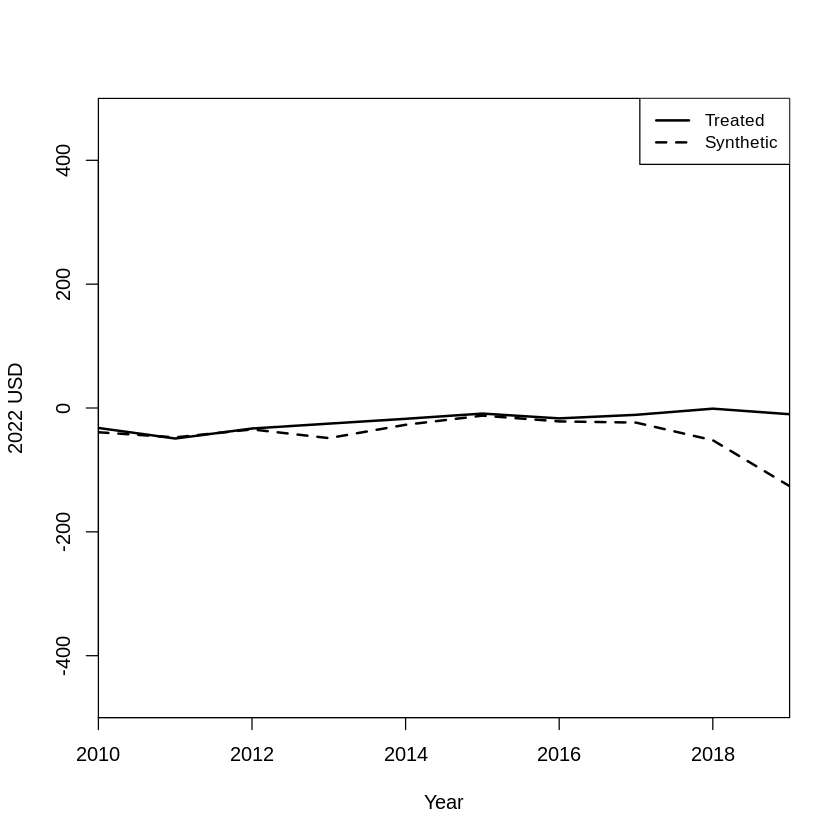

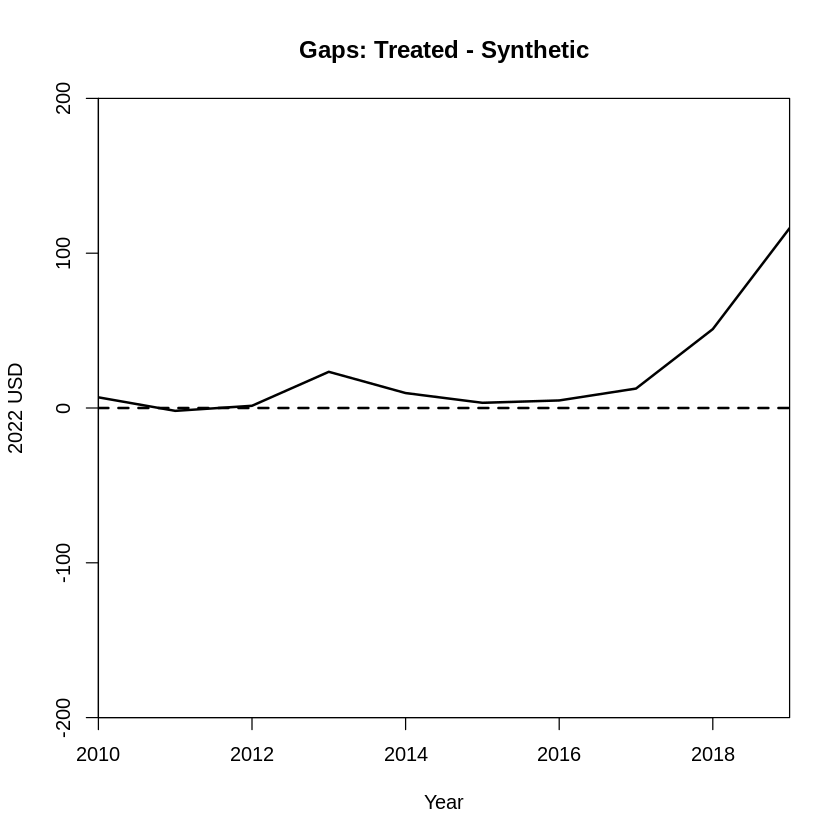

In [ ]:
#BACKDATING

dataprep.out <- dataprep(dd_pc, 
                         predictors = 
                           c("pol_stab", 
                             "gdp_pc"), 
                         predictors.op = "mean",
                         special.predictors = list(
                           list("fdi_pc", 2011, "mean"),
                           list("fdi_pc", 2012, "mean"),
                           list("fdi_pc", 2013, "mean"),
                           list("fdi_pc", 2014, "mean"),
                           list("fdi_pc", 2015, "mean"),
                           list("fdi_pc", 2016, "mean"),
                           list("fdi_pc", 2017, "mean")
                           ),             
                         dependent = "fdi_pc",
                         time.variable = 'year', 
                         time.predictors.prior = c(2010:2012), 
                         unit.names.variable = "country_name",
                         time.optimize.ssr = c(2010:2012), 
                         time.plot = 2010:2019, 
                         unit.variable = "X", 
                         treatment.identifier = "Nigeria",
                         controls.identifier = c(setdiff(1:205, 137))
                         )

synth.out <- synth(dataprep.out)

synth.tables <- synth.tab(
  dataprep.res = dataprep.out, 
  synth.res = synth.out)

print(synth.tables)

path.plot(dataprep.res = dataprep.out,
          synth.res = synth.out
          ,Ylim = c(-500, 500), 
          Ylab = '2022 USD',
          Xlab = "Year"
          )
          

gaps.plot(dataprep.res = dataprep.out,
          synth.res = synth.out 
          ,Ylim = c(-200, 200), 
          Ylab = '2022 USD',
          Xlab = "Year"
          )


X1, X0, Z1, Z0 all come directly from dataprep object.


**************** 
 searching for synthetic control unit  
 

**************** 
**************** 
**************** 

MSPE (LOSS V): 42.77443 

solution.v:
 0.01965173 7.27603e-05 0.06039563 0.1762638 0.3578438 0.06631009 0.2362999 0.07523052 0.007931845 

solution.w:
 0.0001276814 0.0001179519 1.19832e-05 1.78932e-05 0.0001538412 0.0001046657 0.0001370249 0.0001400459 0.0001019678 7.7076e-05 0.0001489913 0.0001344249 9.33551e-05 8.19518e-05 0.0001138433 9.00545e-05 0.0001354776 9.89423e-05 0.0001326422 0.000143397 0.0002408263 0.000131598 0.0001439744 0.0001401944 0.0001279189 0.0001273687 0.0001029558 0.0001367218 0.0001455534 8.12451e-05 0.0001262502 0.0001393123 0.0001404473 0.0001451181 8.7749e-06 3.1562e-06 0.0001113102 0.0001227593 0.0001422472 0.0001049587 0.0001371649 4.082e-07 0.0001564714 0.0001185209 0.0001255608 0.0001188333 0.0001334597 0.0006951363 0.0001096745 0.0001894481 0.0001378136 0.0001150425 0.0001316526 0.0

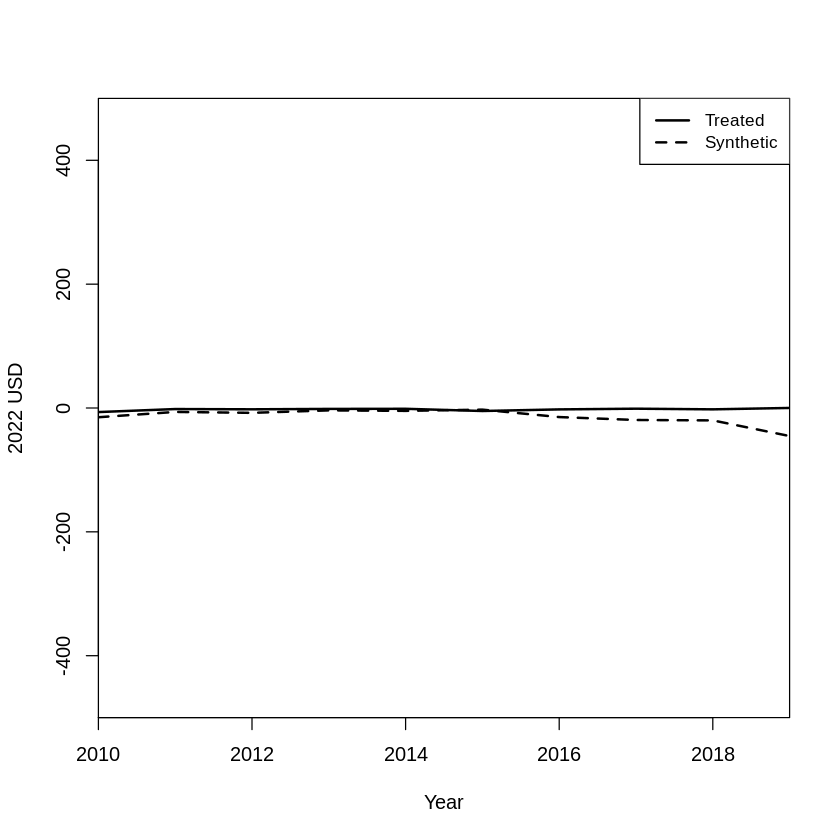

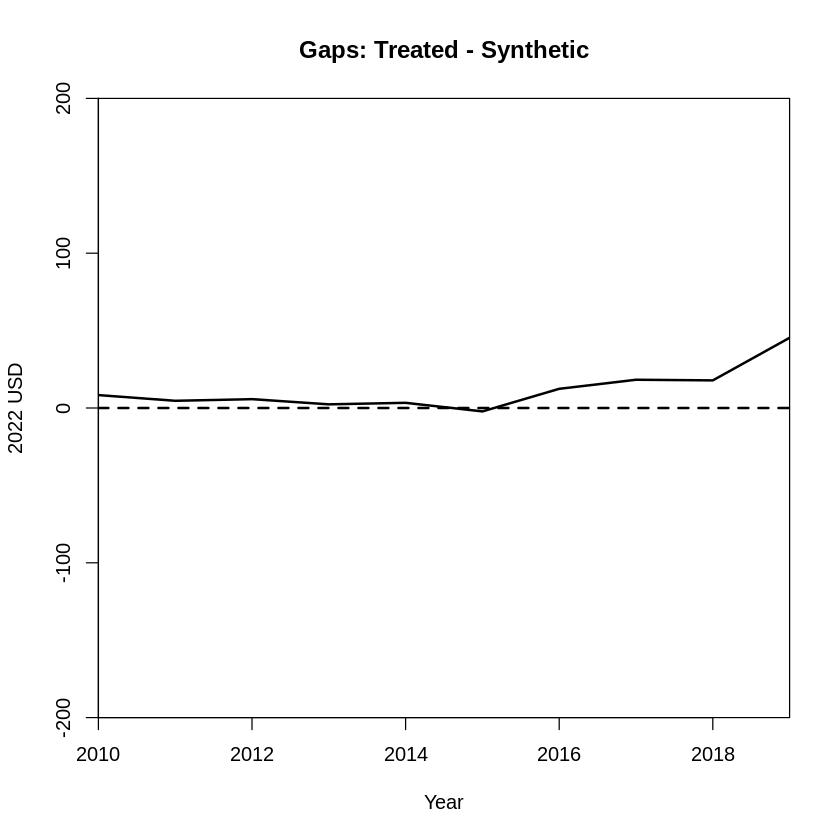

In [ ]:
# CHANGE TREATMENT UNIT
dataprep.out <- dataprep(dd_pc, 
                         predictors = 
                           c("pol_stab", 
                             "gdp_pc"), 
                         predictors.op = "mean",
                         special.predictors = list(
                           list("fdi_pc", 2011, "mean"),
                           list("fdi_pc", 2012, "mean"),
                           list("fdi_pc", 2013, "mean"),
                           list("fdi_pc", 2014, "mean"),
                           list("fdi_pc", 2015, "mean"),
                           list("fdi_pc", 2016, "mean"),
                           list("fdi_pc", 2017, "mean")
                           ),             
                         dependent = "fdi_pc",
                         time.variable = 'year', 
                         time.predictors.prior = c(2010:2016), 
                         unit.names.variable = "country_name",
                         time.optimize.ssr = c(2010:2016), 
                         time.plot = 2010:2019, 
                         unit.variable = "X", 
                         treatment.identifier = "Afghanistan",
                         controls.identifier = c(setdiff(2:205, 137))
                         )

synth.out <- synth(dataprep.out)

synth.tables <- synth.tab(
  dataprep.res = dataprep.out, 
  synth.res = synth.out)

print(synth.tables)

path.plot(dataprep.res = dataprep.out,
          synth.res = synth.out
          ,Ylim = c(-500, 500), 
          Ylab = '2022 USD',
          Xlab = "Year"
          )
          

gaps.plot(dataprep.res = dataprep.out,
          synth.res = synth.out 
          ,Ylim = c(-200, 200), 
          Ylab = '2022 USD',
          Xlab = "Year"
          )


X1, X0, Z1, Z0 all come directly from dataprep object.


**************** 
 searching for synthetic control unit  
 

**************** 
**************** 
**************** 

MSPE (LOSS V): 24.30375 

solution.v:
 0.02146154 0.02154329 0.0559597 0.1741945 0.3936471 0.08865726 0.1569725 0.07219106 0.01537306 

solution.w:
 0.0006327385 0.0008944899 3.95024e-05 5.28077e-05 0.001150765 0.0003432918 0.0005730734 0.0008523643 0.002419674 0.0001758031 0.0003318204 0.0007264008 0.0002888048 0.0002377798 0.001122716 0.0002313217 0.0007814994 0.0006013036 0.0006496808 0.0008925655 0.0003629162 0.0008552017 0.0009555476 0.0008506703 0.0007395219 0.0005359306 0.0002589037 0.0007112976 0.0009358476 0.1700156 0.0007003009 0.0008547886 0.001096786 0.0003471471 2.67994e-05 0.000330593 0.0009795774 0.000448022 0.0008311448 0.0005679706 0.0006930262 0.1227427 0.0008676724 0.0005039028 0.001188971 0.000469471 0.0007048319 0.001485495 0.0003793679 0.0004395412 0.0008037434 0.0005242773 0.0006391649 0.0008

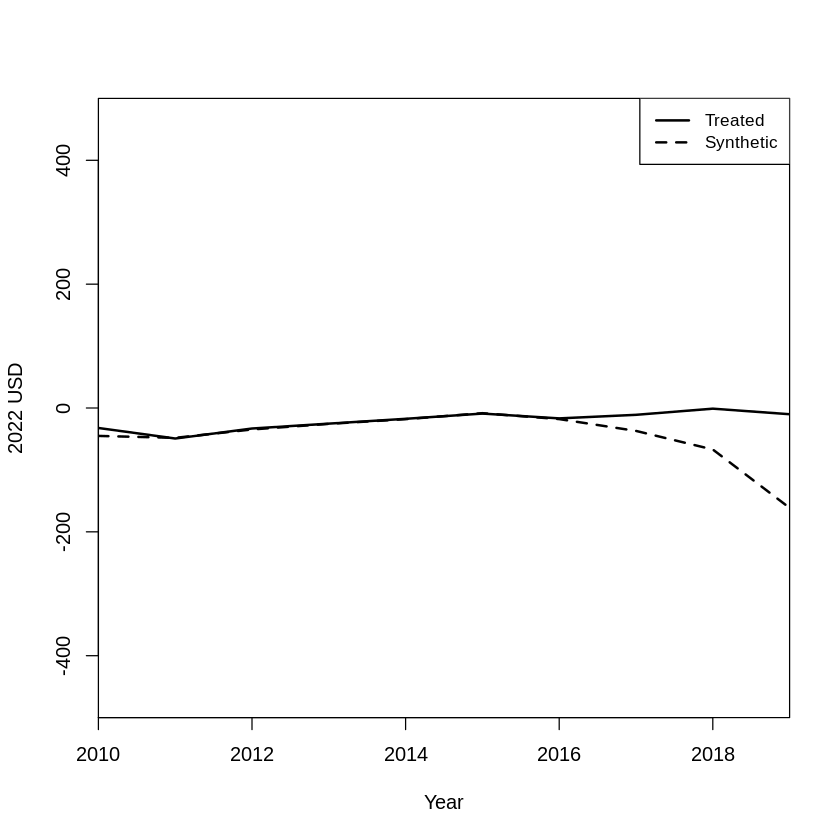

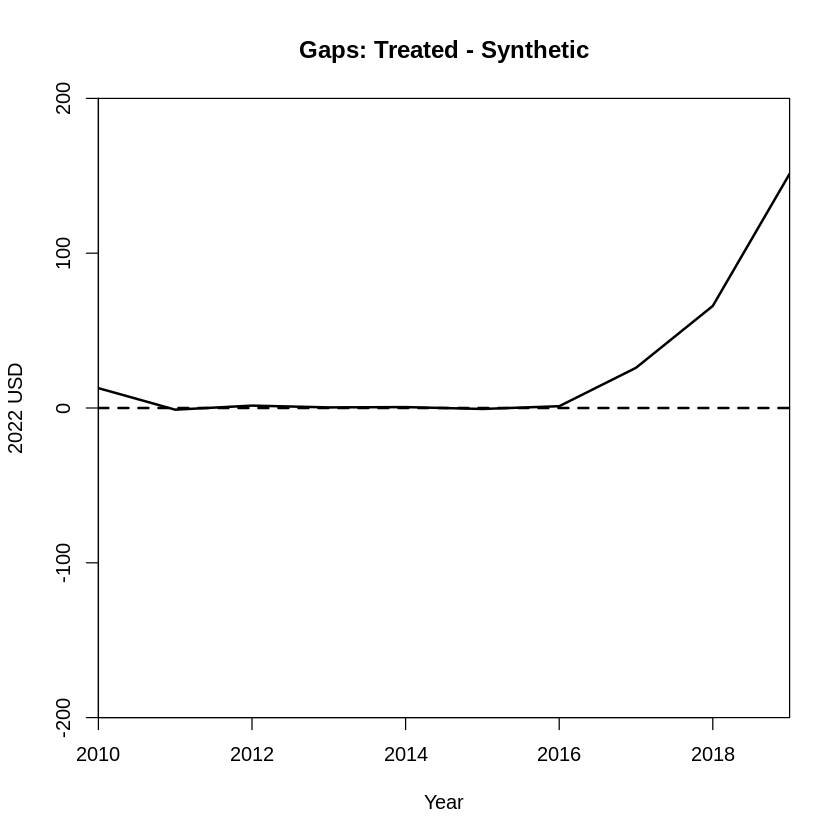

In [ ]:
# Leave Afghanistan out of the donor pool to see if we get similar results
# run dataprep to rewrite the data in a form suitable for the 'synth' command
dataprep.out <- dataprep(dd_pc, 
                         predictors = 
                           c("pol_stab", 
                             "gdp_pc"), 
                         predictors.op = "mean",
                         special.predictors = list(
                           list("fdi_pc", 2011, "mean"),
                           list("fdi_pc", 2012, "mean"),
                           list("fdi_pc", 2013, "mean"),
                           list("fdi_pc", 2014, "mean"),
                           list("fdi_pc", 2015, "mean"),
                           list("fdi_pc", 2016, "mean"),
                           list("fdi_pc", 2017, "mean")
                           ),             
                         dependent = "fdi_pc",
                         time.variable = 'year', 
                         time.predictors.prior = c(2010:2016), 
                         unit.names.variable = "country_name",
                         time.optimize.ssr = c(2010:2016), 
                         time.plot = 2010:2019, 
                         unit.variable = "X", 
                         treatment.identifier = "Nigeria",
                         controls.identifier = c(setdiff(2:205, 137))
                         )

#run the synthetic control model
synth.out <- synth(dataprep.out)

synth.tables <- synth.tab(
  dataprep.res = dataprep.out, 
  synth.res = synth.out)

print(synth.tables)


# shows outcome trend of the treated and control units
path.plot(dataprep.res = dataprep.out,
          synth.res = synth.out
          ,Ylim = c(-500, 500), 
          Ylab = '2022 USD',
          Xlab = "Year"
          )
          
# shows difference between the treated and control units
gaps.plot(dataprep.res = dataprep.out,
          synth.res = synth.out 
          ,Ylim = c(-200, 200), 
          Ylab = '2022 USD',
          Xlab = "Year"
          )

## Model 2. 
This model uses country data where all countries with missing at least one missing fdi value were removed from the donor pool. The donor pool is made up of 166 countries.

In [ ]:
# load cleaned data 
dd2 <- read.csv(url("https://raw.githubusercontent.com/ibukunlola/capstone/main/model3/nan_removed_df.csv"))

# create unique unit numbers for each country in the dataframe
countries2 <- unique(dd2$country_name)
count = 1
for (country in countries2){
  indices <- which(dd2$country_name == country)
  for (index in indices){
    dd2$X[index] <- count
  }
  count = count+1
}

head(dd2, n = 10)

,X,country_name,year,fdi,pol_stab,gni,gdp,pop
,<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,Afghanistan,2010,-192022479,-2.579152,15884609987,15856678596,29185511
2,1,Afghanistan,2011,-51036284,-2.502060,17785698871,17805113119,30117411
3,1,Afghanistan,2012,-65684511,-2.418561,19938663919,19907317066,31161378
4,1,Afghanistan,2013,-47774027,-2.519349,20216694880,20146404996,32269592
5,1,Afghanistan,2014,-42994416,-2.411068,20494754800,20497126770,33370804
6,1,Afghanistan,2015,-166983555,-2.571222,19307190568,19134211764,34413603
7,1,Afghanistan,2016,-79585269,-2.671054,18297097175,18116562465,35383028
8,1,Afghanistan,2017,-40273161,-2.801084,19000254383,18753469630,36296111
9,1,Afghanistan,2018,-80631404,-2.763864,18240838102,18053228579,37171922


In [ ]:
# generate new dataframe with per-capita data on the predictors and outcome variable
fdi_pc2 = dd2$fdi/dd2$pop
gni_pc2 = dd2$gni/dd2$pop
gdp_pc2 = dd2$gdp/dd2$pop

dd_pc2 = data.frame(dd2$X, dd2$country_name, dd2$year, fdi_pc2, dd2$pol_stab,
                   gni_pc2, gdp_pc2)

# change column names
colnames(dd_pc2) <- c("X", "country_name", "year", "fdi_pc", "pol_stab",
                  "gni_pc", "gdp_pc")

write.csv(dd_pc2,"nan_removed_pc_df.csv", row.names = FALSE)

In [ ]:
# summarize dataset
summary(dd_pc2)

       X         country_name            year          fdi_pc          
 Min.   :  1.0   Length:1660        Min.   :2010   Min.   :-280375.21  
 1st Qu.: 42.0   Class :character   1st Qu.:2012   1st Qu.:   -292.37  
 Median : 83.5   Mode  :character   Median :2014   Median :    -80.99  
 Mean   : 83.5                      Mean   :2014   Mean   :   -317.24  
 3rd Qu.:125.0                      3rd Qu.:2017   3rd Qu.:    -14.62  
 Max.   :166.0                      Max.   :2019   Max.   : 278715.51  
    pol_stab             gni_pc            gdp_pc       
 Min.   :-2.810035   Min.   :    314   Min.   :    316  
 1st Qu.:-0.594227   1st Qu.:   2226   1st Qu.:   2174  
 Median : 0.047734   Median :   5677   Median :   5915  
 Mean   :-0.009758   Mean   :  17318   Mean   :  17759  
 3rd Qu.: 0.781028   3rd Qu.:  16856   3rd Qu.:  17543  
 Max.   : 1.639301   Max.   :4359868   Max.   :4359275  


X1, X0, Z1, Z0 all come directly from dataprep object.


**************** 
 searching for synthetic control unit  
 

**************** 
**************** 
**************** 

MSPE (LOSS V): 1.274593 

solution.v:
 2.96088e-05 0.0001185721 0.03106489 0.1836916 0.4332344 0.03305648 0.2614046 0.05687999 0.0005198578 

solution.w:
 0.5733862 0.001050383 0.002205411 0.001750573 0.0006973891 0.0009535235 0.001226287 0.00306578 0.000484073 0.0005502905 0.001290341 0.0005911772 0.00374113 0.001122339 0.0008611914 0.0009799344 0.001315537 0.0007373273 0.001073877 0.001435619 0.001364292 0.0009623794 0.0009375829 0.0005494534 0.001078322 0.001905151 0.0009861237 0.001320266 0.002026989 0.0006194788 0.0007890503 0.001352534 0.001407461 0.02641653 0.0008598397 0.002807314 0.0008008303 0.000948187 0.0006651985 0.0007131376 0.001311787 0.0008426271 0.001010901 0.001341585 0.003268686 0.001247838 0.0007982896 0.001466013 0.005347387 0.0009768289 0.001533171 0.000744453 0.001455144 0.001281609 0.000688

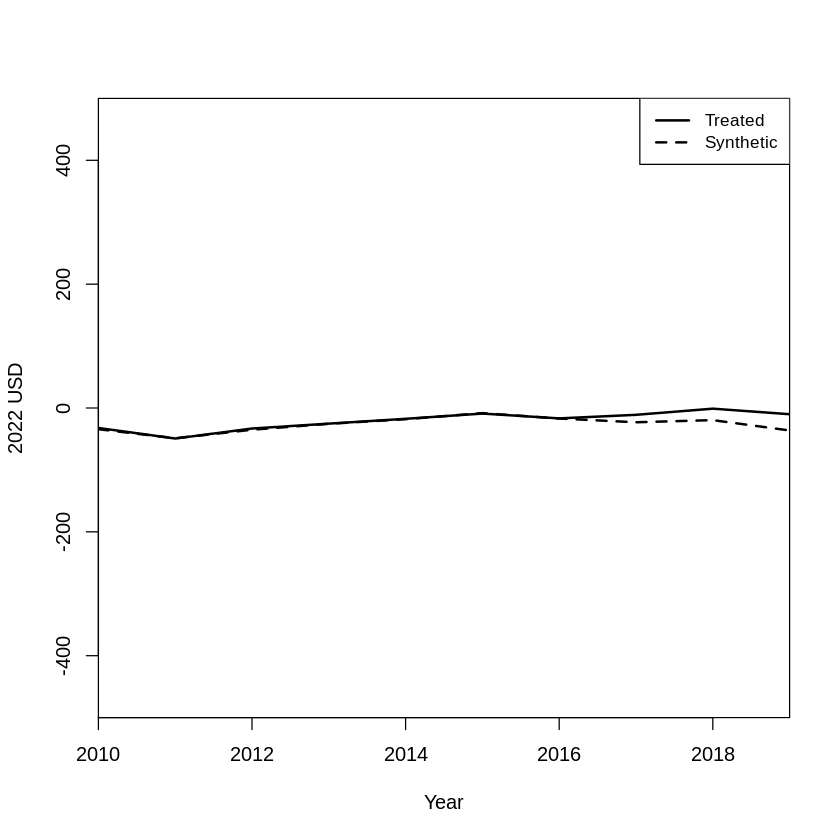

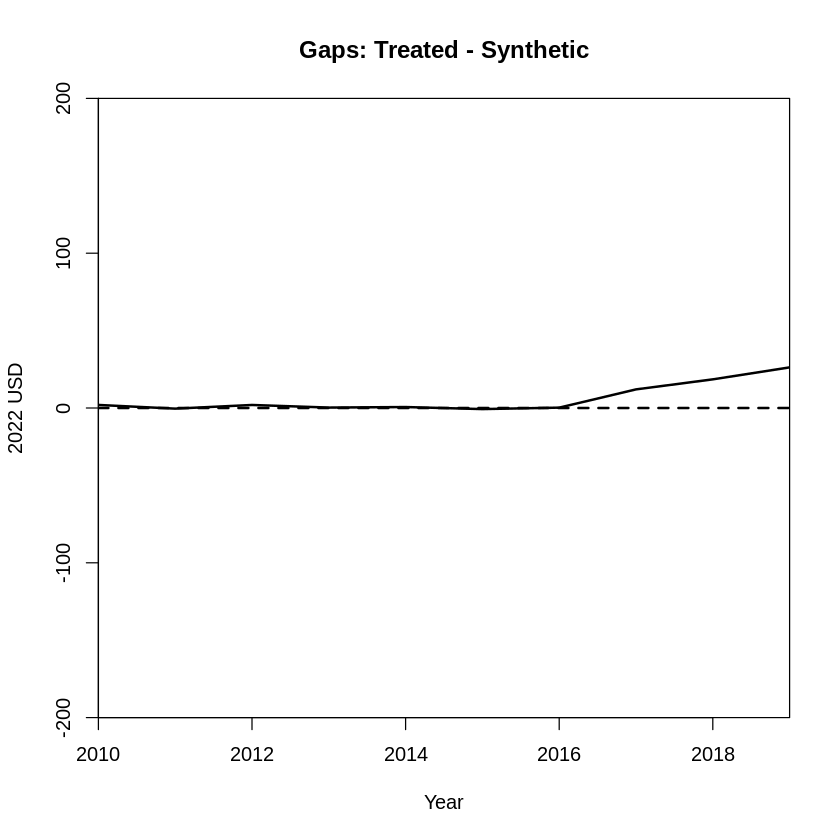

In [ ]:
dataprep.out2 <- dataprep(dd_pc2, 
                         predictors = 
                           c("pol_stab", 
                             "gdp_pc"), 
                         predictors.op = "mean",
                         special.predictors = list(
                           list("fdi_pc", 2011, "mean"),
                           list("fdi_pc", 2012, "mean"),
                           list("fdi_pc", 2013, "mean"),
                           list("fdi_pc", 2014, "mean"),
                           list("fdi_pc", 2015, "mean"),
                           list("fdi_pc", 2016, "mean"),
                           list("fdi_pc", 2017, "mean")
                           ),             
                         dependent = "fdi_pc",
                         time.variable = 'year', 
                         time.predictors.prior = c(2010:2016), 
                         unit.names.variable = "country_name",
                         time.optimize.ssr = c(2010:2016), 
                         time.plot = 2010:2019, 
                         unit.variable = "X", 
                         treatment.identifier = "Nigeria",
                         controls.identifier = c(setdiff(1:166, 112))
                         )

synth.out2 <- synth(dataprep.out2)

synth.tables2 <- synth.tab(
  dataprep.res = dataprep.out2, 
  synth.res = synth.out2)

print(synth.tables2)

path.plot(dataprep.res = dataprep.out2,
          synth.res = synth.out2
          ,Ylim = c(-500, 500),
          Ylab = "2022 USD",
          Xlab = "Year"
          )

gaps.plot(dataprep.res = dataprep.out2,
          synth.res = synth.out2 
          ,Ylim = c(-200, 200),
          Ylab = "2022 USD",
          Xlab = "Year"
          )

In [ ]:
#extract the names, weights, and unit numbers of the top 20 donor countries (by weight) in the donor pool
top_donors2 <- synth.tables2$tab.w %>%                                      
  arrange(desc(w.weights)) %>% 
  slice(1:10)

print(top_donors2)

    w.weights          unit.names unit.numbers
1       0.573         Afghanistan            1
116     0.128            Pakistan          116
142     0.034               Sudan          142
34      0.026    Congo, Dem. Rep.           34
89      0.017               Libya           89
70      0.008                Iraq           70
164     0.008  West Bank and Gaza          164
49      0.005            Ethiopia           49
13      0.004          Bangladesh           13
152     0.004 Trinidad and Tobago          152


In [ ]:
print("Nigeria's FDI values")
print(dataprep.out2$Y1plot)
print("Synthetic control FDI values")
print(dataprep.out2$Y0plot %*% synth.out2$solution.w)

[1] "Nigeria's FDI values"
            112
2010 -32.267696
2011 -49.287788
2012 -33.126977
2013 -25.240317
2014 -17.457188
2015  -8.992979
2016 -16.765914
2017 -11.013299
2018  -1.070472
2019 -10.050481
[1] "Synthetic control FDI values"
       w.weight
2010 -34.243293
2011 -48.876771
2012 -35.085279
2013 -25.519311
2014 -18.078974
2015  -8.289478
2016 -17.002397
2017 -23.042938
2018 -19.581294
2019 -36.293066


In [ ]:
(36.293066 - 10.050481)/36.293066

[1] 0.7230743


X1, X0, Z1, Z0 all come directly from dataprep object.


**************** 
 searching for synthetic control unit  
 

**************** 
**************** 
**************** 

MSPE (LOSS V): 0.04746003 

solution.v:
 1.71893e-05 1.74336e-05 0.1186157 0.7121623 0.02132317 0.08249129 0.05688804 0.007065902 0.00141898 

solution.w:
 1.03895e-05 0.001499305 0.00225698 0.001858987 0.001087629 0.001432742 0.00153795 0.003132682 0.0007930358 0.0008374608 0.001616812 0.00096245 0.002664227 0.00157848 0.001095198 0.001428276 0.001542879 0.003998681 0.00140047 0.00179808 0.001821253 0.001302375 0.001362469 0.0009795029 0.001449945 0.001846127 0.001314163 0.001694295 0.001951645 0.001064965 0.001206186 0.001846238 0.001938896 0.004216264 0.001255622 0.002611216 0.001152476 0.003637671 0.0009937069 0.001303832 0.001504481 0.001163732 0.001431532 0.001830459 0.002277797 0.001540041 0.001262796 0.001735559 0.002888173 0.001409631 0.005100368 0.001198988 0.00165503 0.001719349 0.00113354 0.001557077 0.

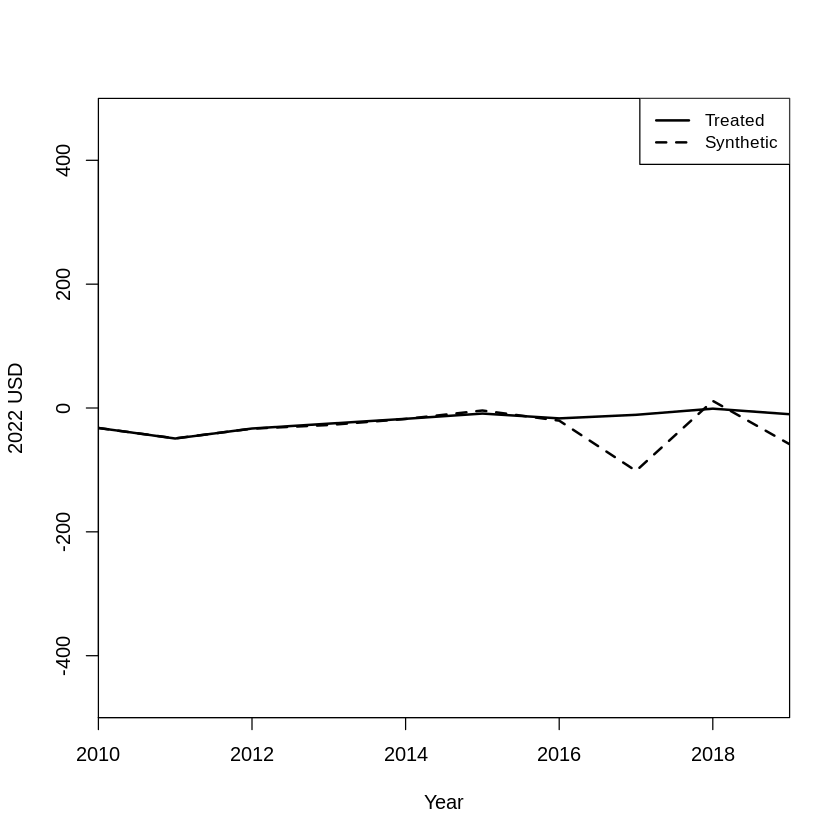

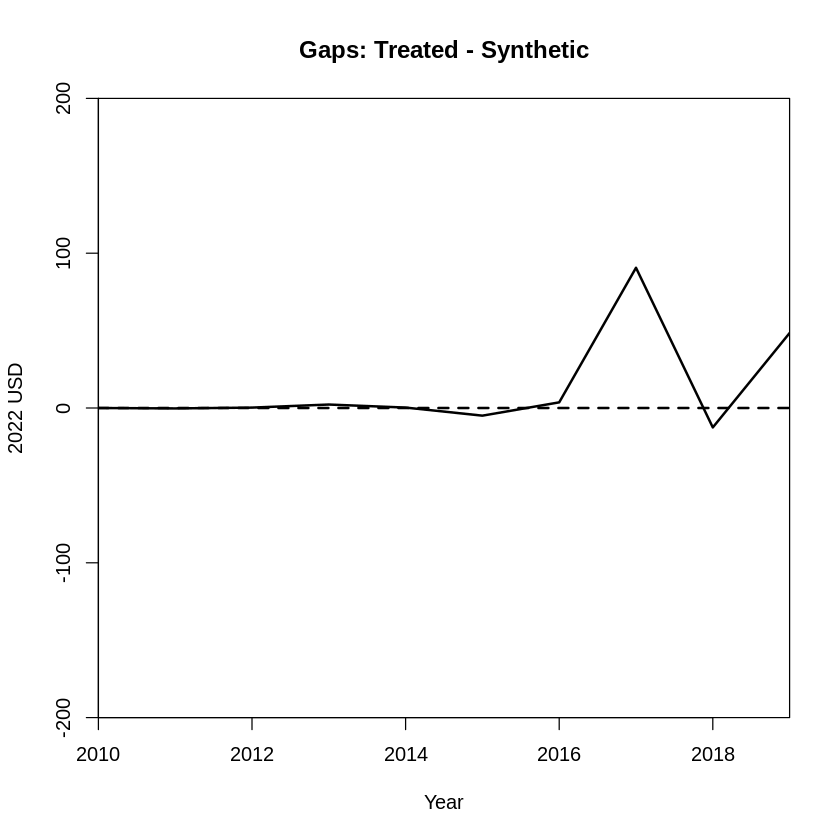

In [ ]:
# BACKDATING
dataprep.out2 <- dataprep(dd_pc2, 
                         predictors = 
                           c("pol_stab", 
                             "gdp_pc"), 
                         predictors.op = "mean",
                         special.predictors = list(
                           list("fdi_pc", 2011, "mean"),
                           list("fdi_pc", 2012, "mean"),
                           list("fdi_pc", 2013, "mean"),
                           list("fdi_pc", 2014, "mean"),
                           list("fdi_pc", 2015, "mean"),
                           list("fdi_pc", 2016, "mean"),
                           list("fdi_pc", 2017, "mean")
                           ),             
                         dependent = "fdi_pc",
                         time.variable = 'year', 
                         time.predictors.prior = c(2010:2012), 
                         unit.names.variable = "country_name",
                         time.optimize.ssr = c(2010:2012), 
                         time.plot = 2010:2019, 
                         unit.variable = "X", 
                         treatment.identifier = "Nigeria",
                         controls.identifier = c(setdiff(1:166, 112))
                         )

synth.out2 <- synth(dataprep.out2)

synth.tables2 <- synth.tab(
  dataprep.res = dataprep.out2, 
  synth.res = synth.out2)

print(synth.tables2)

path.plot(dataprep.res = dataprep.out2,
          synth.res = synth.out2
          ,Ylim = c(-500, 500),
          Ylab = "2022 USD",
          Xlab = "Year"
          )

gaps.plot(dataprep.res = dataprep.out2,
          synth.res = synth.out2 
          ,Ylim = c(-200, 200),
          Ylab = "2022 USD",
          Xlab = "Year"
          )


X1, X0, Z1, Z0 all come directly from dataprep object.


**************** 
 searching for synthetic control unit  
 

**************** 
**************** 
**************** 

MSPE (LOSS V): 0.2063413 

solution.v:
 2.796e-07 7.7624e-06 0.03068222 0.1866354 0.4359331 0.03265096 0.2615163 0.05217969 0.0003942096 

solution.w:
 0.001274986 0.002438265 0.00408017 0.0006758487 0.001040646 0.001658826 0.003421809 0.0003438508 0.000908465 0.001585132 0.000446233 0.004937804 0.001250877 0.0001886533 0.00119963 0.002337483 7.50801e-05 0.001645514 0.002142985 0.001777425 0.001229683 0.0009571244 0.00044165 0.001303573 0.003460358 0.001299872 0.002046365 0.003245195 0.0005709426 0.0008336527 0.001634672 0.001509189 1.48678e-05 0.0008889466 0.003882679 0.0008053418 0.005441424 0.0006431272 0.0005511151 0.001965079 0.0009553809 0.001203233 0.001842044 0.0035182 0.00187765 0.0005388827 0.002067678 0.005888171 0.001163205 0.01315055 0.0006895365 0.002580848 0.001573217 0.0005728888 0.00188364 0.000817

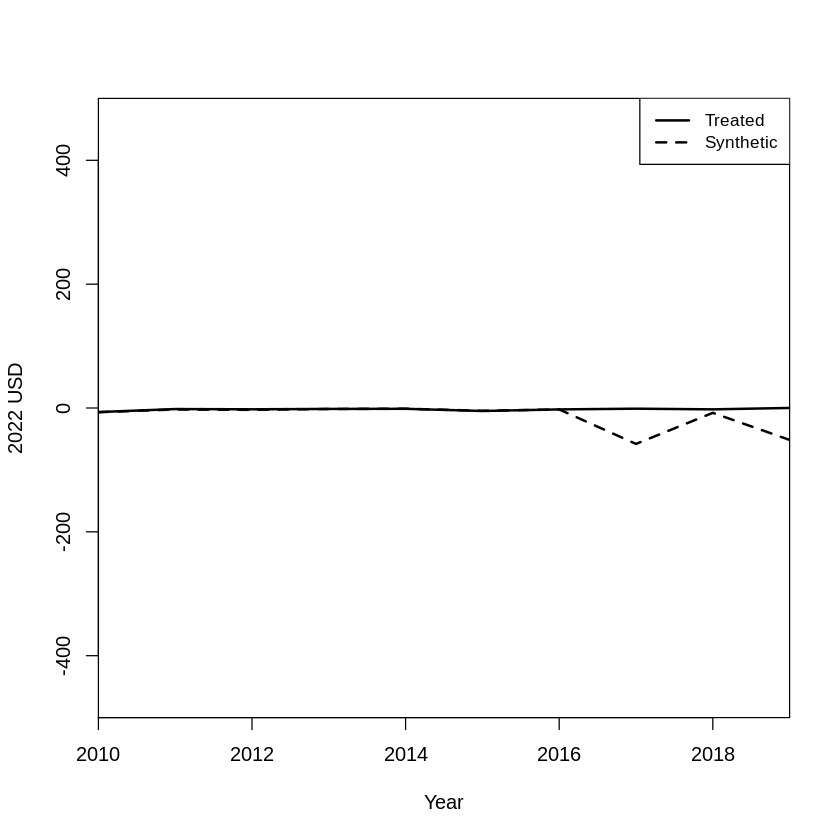

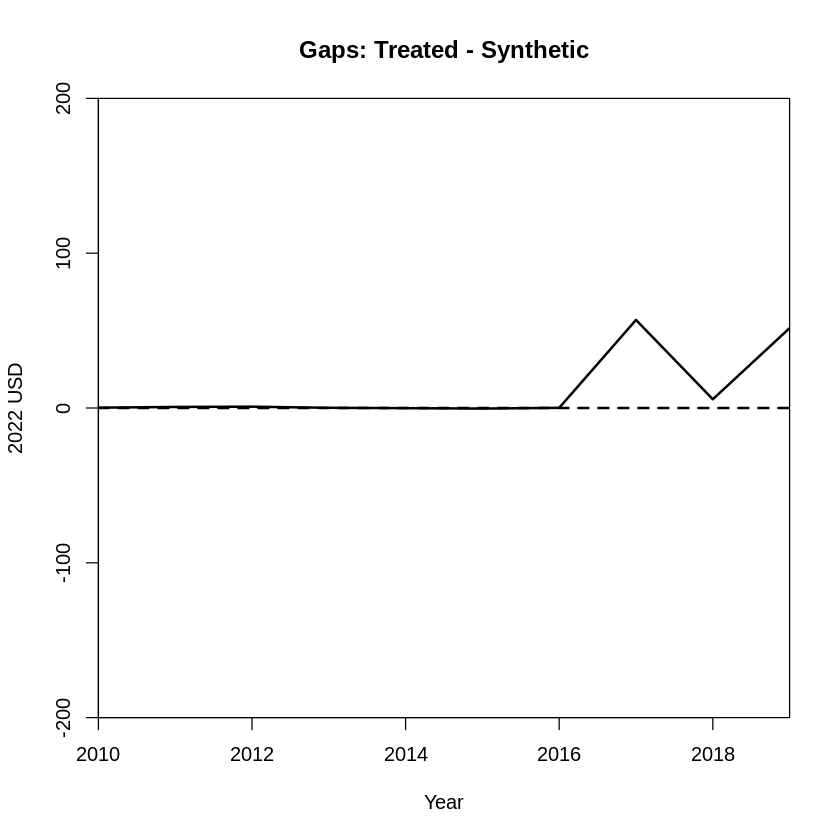

In [ ]:
# CHANGE TREATED UNIT TO AFGHANISTAN
dataprep.out2 <- dataprep(dd_pc2, 
                         predictors = 
                           c("pol_stab", 
                             "gdp_pc"), 
                         predictors.op = "mean",
                         special.predictors = list(
                           list("fdi_pc", 2011, "mean"),
                           list("fdi_pc", 2012, "mean"),
                           list("fdi_pc", 2013, "mean"),
                           list("fdi_pc", 2014, "mean"),
                           list("fdi_pc", 2015, "mean"),
                           list("fdi_pc", 2016, "mean"),
                           list("fdi_pc", 2017, "mean")
                           ),             
                         dependent = "fdi_pc",
                         time.variable = 'year', 
                         time.predictors.prior = c(2010:2016), 
                         unit.names.variable = "country_name",
                         time.optimize.ssr = c(2010:2016), 
                         time.plot = 2010:2019, 
                         unit.variable = "X", 
                         treatment.identifier = "Afghanistan",
                         controls.identifier = c(setdiff(2:166, 112))
                         )

synth.out2 <- synth(dataprep.out2)

synth.tables2 <- synth.tab(
  dataprep.res = dataprep.out2, 
  synth.res = synth.out2)

print(synth.tables2)

path.plot(dataprep.res = dataprep.out2,
          synth.res = synth.out2
          ,Ylim = c(-500, 500),
          Ylab = "2022 USD",
          Xlab = "Year"
          )

gaps.plot(dataprep.res = dataprep.out2,
          synth.res = synth.out2 
          ,Ylim = c(-200, 200),
          Ylab = "2022 USD",
          Xlab = "Year"
          )


X1, X0, Z1, Z0 all come directly from dataprep object.


**************** 
 searching for synthetic control unit  
 

**************** 
**************** 
**************** 

MSPE (LOSS V): 0.592721 

solution.v:
 2.6487e-06 5.09114e-05 0.03020252 0.1834709 0.4332919 0.03358476 0.2616664 0.05733191 0.0003980545 

solution.w:
 0.001419151 0.002089203 0.002877807 0.0007803583 0.001199905 0.00176099 0.004679053 0.0004295219 0.0005658238 0.001603136 0.0005809787 0.002878759 0.001554785 0.000724947 0.001304056 0.002299345 6.703e-07 0.001848603 0.002095594 0.001827375 0.001477915 0.001118721 0.0005436925 0.00152126 0.002763851 0.001471692 0.002028887 0.00259693 0.0006223964 0.0009289829 0.001746542 0.00145312 6.611e-06 0.001079002 0.002702011 0.000941674 0.00192821 0.0007217826 0.0007335476 0.001917283 0.001094595 0.001350651 0.001875574 0.002326439 0.001929283 0.0008808712 0.002081478 0.002752113 0.001287647 0.003904143 0.000797889 0.00247737 0.001644177 0.0007034883 0.001952271 0.0008942543

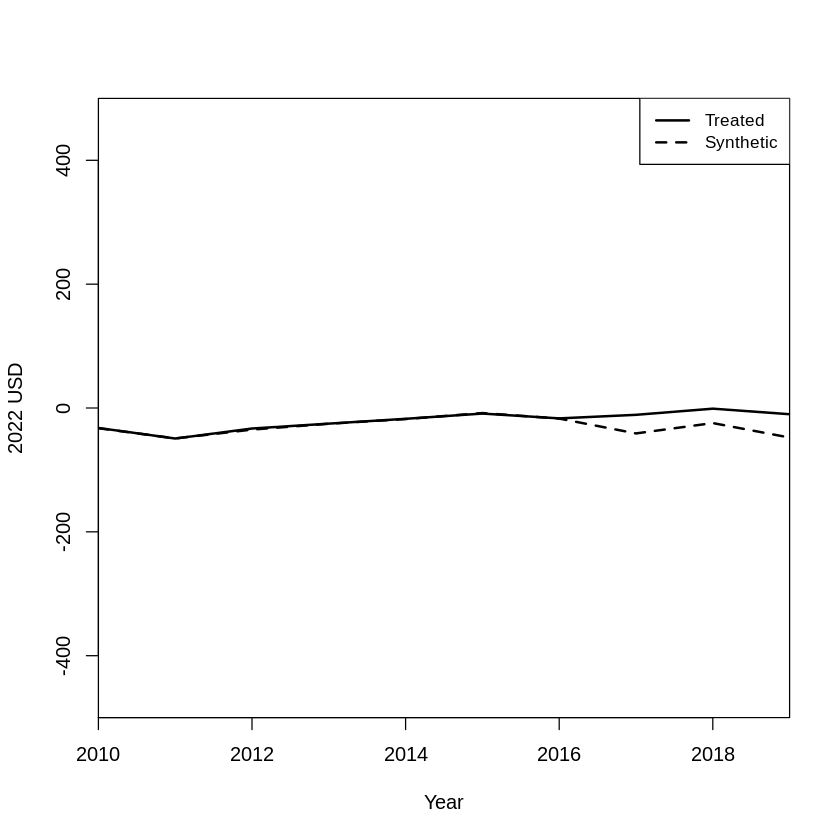

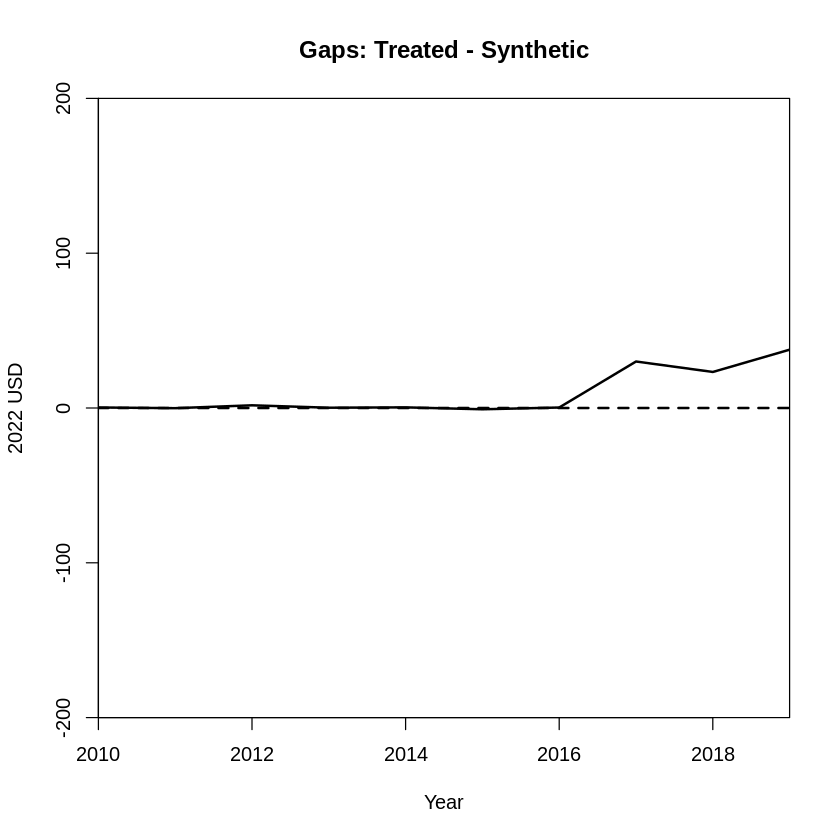

In [ ]:
# Take Afghanistan out of the donor pool
dataprep.out2 <- dataprep(dd_pc2, 
                         predictors = 
                           c("pol_stab", 
                             "gdp_pc"), 
                         predictors.op = "mean",
                         special.predictors = list(
                           list("fdi_pc", 2011, "mean"),
                           list("fdi_pc", 2012, "mean"),
                           list("fdi_pc", 2013, "mean"),
                           list("fdi_pc", 2014, "mean"),
                           list("fdi_pc", 2015, "mean"),
                           list("fdi_pc", 2016, "mean"),
                           list("fdi_pc", 2017, "mean")
                           ),             
                         dependent = "fdi_pc",
                         time.variable = 'year', 
                         time.predictors.prior = c(2010:2016), 
                         unit.names.variable = "country_name",
                         time.optimize.ssr = c(2010:2016), 
                         time.plot = 2010:2019, 
                         unit.variable = "X", 
                         treatment.identifier = "Nigeria",
                         controls.identifier = c(setdiff(2:166, 112))
                         )

synth.out2 <- synth(dataprep.out2)

synth.tables2 <- synth.tab(
  dataprep.res = dataprep.out2, 
  synth.res = synth.out2)

print(synth.tables2)

path.plot(dataprep.res = dataprep.out2,
          synth.res = synth.out2
          ,Ylim = c(-500, 500),
          Ylab = "2022 USD",
          Xlab = "Year"
          )

gaps.plot(dataprep.res = dataprep.out2,
          synth.res = synth.out2 
          ,Ylim = c(-200, 200),
          Ylab = "2022 USD",
          Xlab = "Year"
          )